<a href="https://colab.research.google.com/github/meghana1a/Color_Classifier/blob/main/color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training the model

In [ ]:
!pip install -q git+https://github.com/MJAHMADEE/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.


In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [ ]:
dataset = pd.read_csv('final_data.csv')


In [ ]:
# Pre Process, Clean the Data
#Eliminate Null if it exists
dataset.isnull().sum()

# Converting Categorical Data of 'label` into Numerical
dataset.label.unique()

# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

#Reorder
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
2,144,249,131,0,1,0,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
4,30,182,136,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0
5049,28,28,28,0,0,0,0,0,0,0,0,0,1,0
5050,29,29,29,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

test_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
11,249,99,108,0,0,0,0,0,1,0,0,0,0,0
12,24,161,177,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,18,18,18,0,0,0,0,0,0,0,0,0,1,0
5040,19,19,19,0,0,0,0,0,0,0,0,0,1,0
5042,21,21,21,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
## Split features: `red`, `green`, `blue` and labels

train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

train_dataset

test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

test_dataset


,red,green,blue
0,20,139,240
1,174,83,72
3,168,25,156
11,249,99,108
12,24,161,177
...,...,...,...
5039,18,18,18
5040,19,19,19
5042,21,21,21
5048,27,27,27


Build & Compile the Model

In [ ]:
#Set up the layers

from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])


In [ ]:
# Compile the model

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 24)                96        
                                                                 
 dense_5 (Dense)             (None, 11)                275       
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""## Train the model"""

history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.3,
                    epochs=5001,
                    batch_size=48,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


Epoch: 0, accuracy:0.7610,  loss:0.5976,  val_accuracy:0.7370,  val_loss:0.6555,  
....................................................................................................
Epoch: 100, accuracy:0.7911,  loss:0.5036,  val_accuracy:0.7626,  val_loss:0.5881,  
....................................................................................................
Epoch: 200, accuracy:0.8088,  loss:0.4842,  val_accuracy:0.7749,  val_loss:0.5776,  
....................................................................................................
Epoch: 300, accuracy:0.8095,  loss:0.4742,  val_accuracy:0.7824,  val_loss:0.5562,  
....................................................................................................
Epoch: 400, accuracy:0.8130,  loss:0.4679,  val_accuracy:0.7865,  val_loss:0.5415,  
....................................................................................................
Epoch: 500, accuracy:0.8134,  loss:0.4638,  val_accuracy:0.7873,  val_l

,loss,accuracy,val_loss,val_accuracy,epoch
4996,0.425955,0.825380,0.536258,0.798846,4996
4997,0.429072,0.826087,0.528981,0.790602,4997
4998,0.433872,0.821492,0.524057,0.795548,4998
4999,0.426206,0.819371,0.559677,0.785655,4999
5000,0.429293,0.825380,0.540406,0.787304,5000


In [ ]:
model.save('colormodel_trained_89.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_89.h5')

"""# Make Prediction
The prediction by the ANN model is an array of 11 numbers.
They represent the model's "confidence" that the RGB color corresponds to each of the 11 different classes of color as follows:

* 0 for Red
* 1 for Green
* 2 for Blue
* 3 for Yellow
* 4 for Orange
* 5 for Pink
* 6 for Purple
* 7 for Brown
* 8 for Grey
* 9 for Black
* 10 for White

## Train Dataset Prediction
"""

train_predictions = model.predict(train_dataset)
train_predictions

"""### Selecting Class with highest confidence"""

actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

"""### Converting numpy array to pandas dataframe"""

actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

"""## Test Dataset Prediction"""

test_predictions = model.predict(test_dataset)
test_predictions

"""# Evaluate Model
## Evaluating for Training Dataset
"""
model.evaluate(x=train_dataset, y=train_labels)

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train


127/127 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.8815


array([[ 158,    0,    0,    0,    9,   13,    1,   11,    0,    0,    0],
       [   0, 1096,   24,   21,    0,    1,    0,   10,   12,    0,    4],
       [   0,   26,  797,    0,    0,    0,   26,    0,   14,    1,    1],
       [   0,   21,    0,  185,   17,    0,    0,    5,    1,    0,    0],
       [  17,    0,    0,    3,  141,    1,    0,    8,    0,    0,    0],
       [  18,    0,    0,    0,    0,  382,   53,    8,    1,    0,    0],
       [   1,    0,   18,    0,    0,   28,  382,    4,    6,    1,    7],
       [   8,    1,    0,    4,    6,    3,    4,  275,    4,    0,    0],
       [   0,    2,    7,    1,    0,    0,    7,    8,  116,    0,    2],
       [   0,   17,    0,    0,    0,    0,    1,    0,    8,   13,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    4,    0,   18]])

Libraries

In [ ]:
import PIL
from PIL import Image

from IPython.display import display

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from keras import layers


Generate Random R,G,B value

In [ ]:
import random
def generate_random_rgb():
    return (int(random.uniform(0,255)), int(random.uniform(0,255)), int(random.uniform(0,255)))



Create a new image with the given size

In [ ]:
def create_image(i, j):
  image = Image.new("RGB", (i, j), color=generate_random_rgb())
  return image


Get the pixel from the given image

In [ ]:
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None
  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel



Recreate the exact same model, including its weights and the optimizer

In [ ]:
model = tf.keras.models.load_model('colormodel_trained_89.h5')

#Show the model architecture
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 24)                96        
                                                                 
 dense_14 (Dense)            (None, 11)                275       
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


 Mapping the Color Index with the respective 11 Classes

In [ ]:
color_dict={
    0 : 'Red',
    1 : 'Green',
    2 : 'Blue',
    3 : 'Yellow',
    4 : 'Orange',
    5 : 'Pink',
    6 : 'Purple',
    7 : 'Brown',
    8 : 'Grey',
    9 : 'Black',
    10 : 'White'
}

In [ ]:
# Specifying number of images to be classified
n=5

Predicting

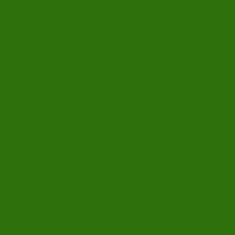

1/1 [==============================] - 0s 34ms/step
            Green



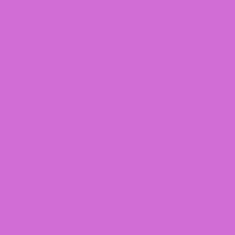

1/1 [==============================] - 0s 31ms/step
            Pink



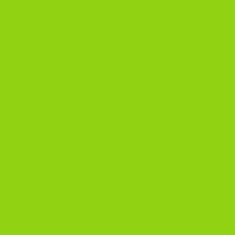

1/1 [==============================] - 0s 32ms/step
            Green



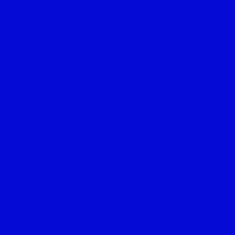

1/1 [==============================] - 0s 33ms/step
            Blue



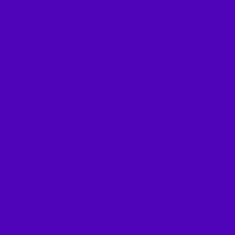

1/1 [==============================] - 0s 31ms/step
            Blue



In [ ]:
for i in range(n) :
    img = create_image(235,235) #(235,235) is the (width,heigth) of the image
    rgb = get_pixel(img,200,200) # any pixel within the image is given
    rgb = np.asarray(rgb) #rgb to numpy array
    input_rgb = np.reshape(rgb, (-1,3)) #reshaping as per input to ANN model
    display(img)
    color_class_confidence = model.predict(input_rgb) # Output of layer is in terms of Confidence of the 11 classes
    color_index = np.argmax(color_class_confidence, axis=1) #finding the color_class index from confidence
    color = color_dict[int(color_index)]
    print('            ' + color)
    print()